In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from wordcloud import WordCloud

In [2]:
# Load data
book_data = pd.read_csv('prepared_bookdata.csv')

In [3]:
book_data.head()

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,combined_text,User_id,rating
0,The Church of Christ: A Biblical Ecclesiology ...,In The Church of Christ: A Biblical Ecclesiolo...,['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],5.0,The Church of Christ: A Biblical Ecclesiology ...,ARI272XF8TOL4,5.0
1,The Battleship Bismarck,The Bismarck is perhaps the most famous – and ...,['Stefan Draminski'],Bloomsbury Publishing,2018-09-20,['History'],1.0,The Battleship Bismarck The Bismarck is perhap...,A30IUAABSEHEPI,3.0
2,Beginner's Yoruba (Hippocrene Beginner's Series),"""Beginner's Yoruba"" is now available with two ...",['Kayode J. Fakinlede'],Hippocrene Books,2005,['Foreign Language Study'],1.0,Beginner's Yoruba (Hippocrene Beginner's Serie...,A1F0EV2MBF208I,4.0
3,The Impatient Gardener's Lawn Book,"Explains how to grow a green, beautiful lawn a...",['Jerry Baker'],"Random House Digital, Inc.",1987,['Gardening'],1.0,The Impatient Gardener's Lawn Book Explains ho...,A27H3RG5KF1MCI,4.0
4,America at 1750: A Social Portrait,Demonstrates how the colonies developed into t...,['Richard Hofstadter'],Vintage,1973,['History'],2.0,America at 1750: A Social Portrait Demonstrate...,A3DKP67DK28RUB,5.0


In [4]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          8955 non-null   object 
 1   description    8955 non-null   object 
 2   authors        8955 non-null   object 
 3   publisher      8955 non-null   object 
 4   publishedDate  8955 non-null   object 
 5   categories     8955 non-null   object 
 6   ratingsCount   8955 non-null   float64
 7   combined_text  8955 non-null   object 
 8   User_id        8955 non-null   object 
 9   rating         8955 non-null   float64
dtypes: float64(2), object(8)
memory usage: 699.7+ KB


## Summary Statistics ##

In [5]:
book_data.describe()


,ratingsCount,rating
count,8955.000000,8955.000000
mean,2.187605,4.368063
std,1.724646,1.051758
min,1.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,5.000000
75%,3.000000,5.000000
max,8.000000,5.000000


## Checking missing values ##

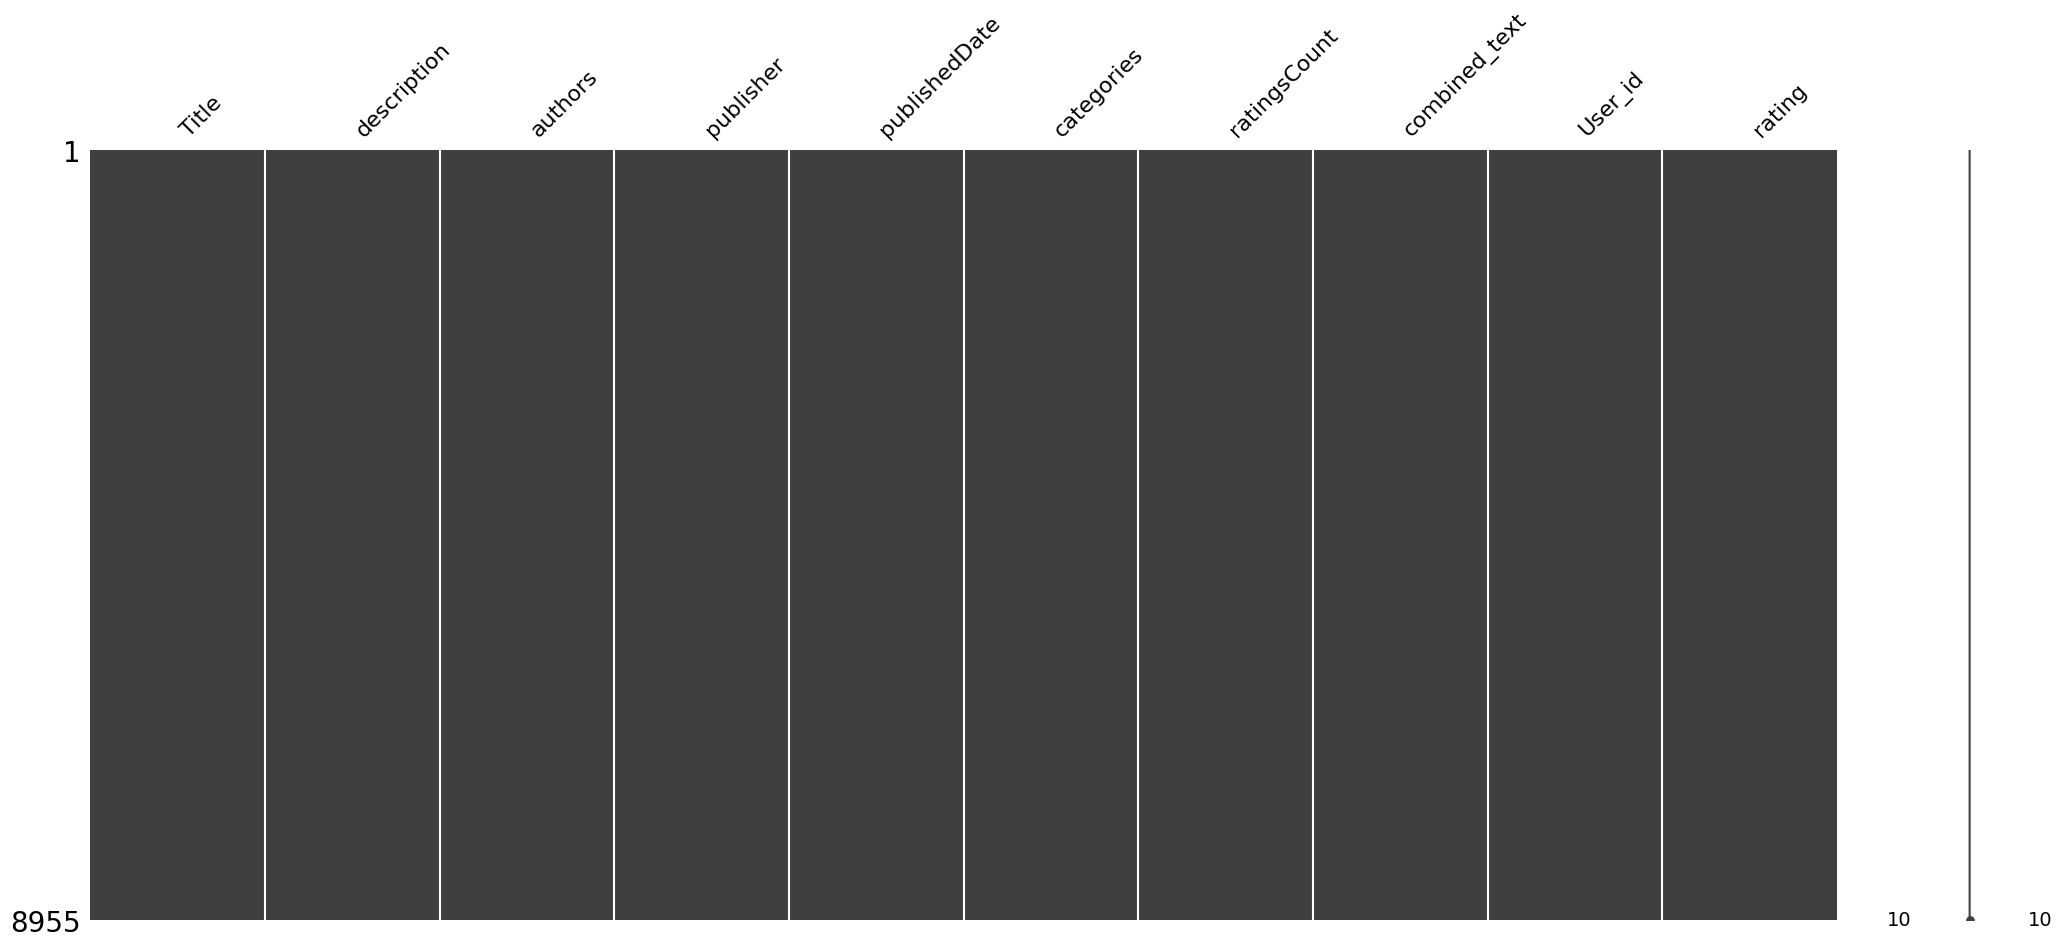

Title            0
description      0
authors          0
publisher        0
publishedDate    0
categories       0
ratingsCount     0
combined_text    0
User_id          0
rating           0
dtype: int64


In [6]:
# Visualize missing values
msno.matrix(book_data)
plt.show()

# Calculate missing values
print(book_data.isnull().sum())



### Exploratory Data Analysis ###

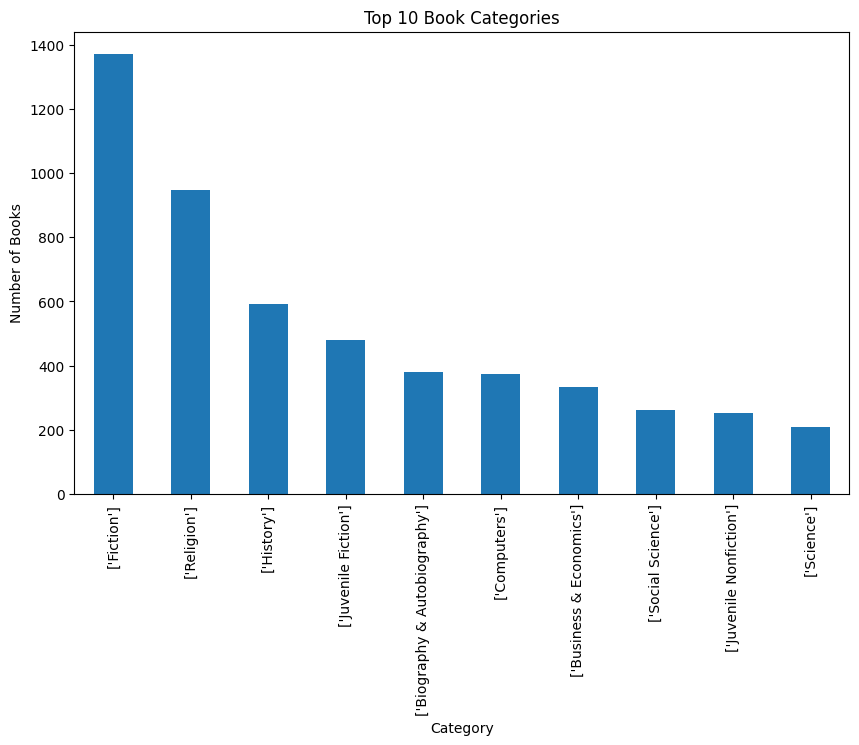

In [7]:
# Top categories
top_categories = book_data['categories'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_categories.plot(kind='bar')
plt.title('Top 10 Book Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.show()


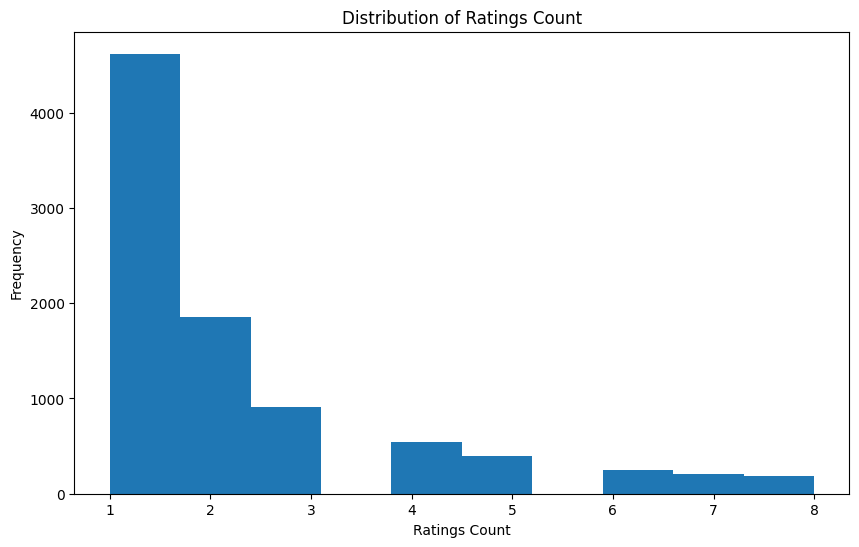

In [8]:
# Rating count distribution
plt.figure(figsize=(10,6))
plt.hist(book_data['ratingsCount'], bins=10)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()


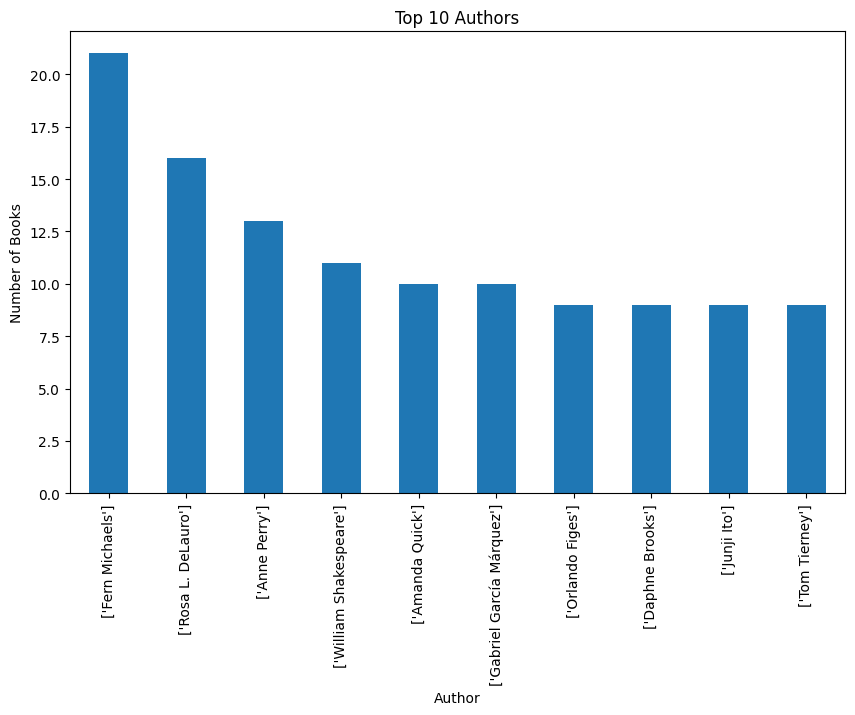

In [9]:
# Authors Analysis
top_authors = book_data['authors'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()


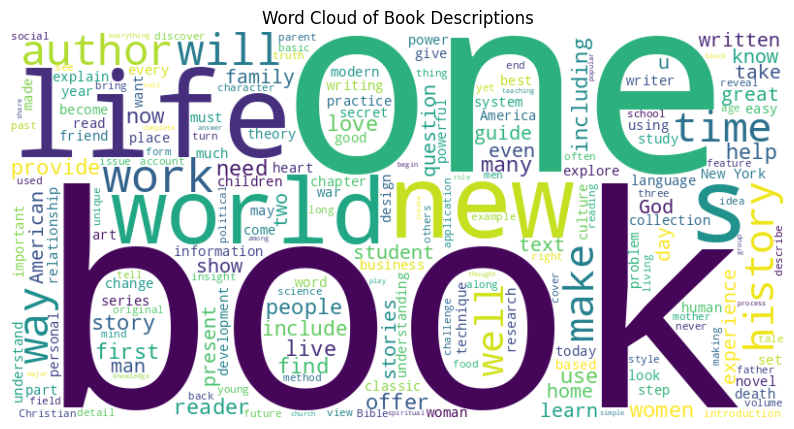

In [10]:
# Word count of description
text = ' '.join(book_data['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Descriptions')
plt.show()
